In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import tensorflow as tf

import cv2
import os

%matplotlib inline

In [2]:
import numpy as np
import os, random, tensorflow as tf

def set_seed(seed_value=1234):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

set_seed(1234)

# Prepare dataset

## Read videos

### code below will do this:
- read videos from folder, capture frames of them to image tpye
- this fuction will capture 1 frame per 0.1 second per video
- resize image that captured to 28x28 pixel
- write array of images to csv file. The fist column is label of the image and other column is pixel data
- labels of image 0 to 24 represent meaning of hand sign language consis of A to Z exept J and Z

In [ ]:
# import csv

# labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
# number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20, 21, 22, 23, 24]
# i=0
# label_count = 0
# with open(f"{'db_new'}.csv", "a", newline="") as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(["label"] + [f"pixel{i+1}" for i in range(28 * 28)])
    
#     for label in labels:
#         #  convert video to image frame by frame
#         cap = cv2.VideoCapture('./videos/{}.mp4'.format(label))
#         interval = 100 #read 1 frame per  1 millisecond
#         cap.set(cv2.CAP_PROP_POS_MSEC, interval)
#         imgs = []
#         while(cap.isOpened()):
#             ret, frame = cap.read()
#             if ret == False:
#                 break
#             cap.set(cv2.CAP_PROP_POS_MSEC, cap.get(cv2.CAP_PROP_POS_MSEC) + interval)
#             #  append frame type Image to array 'imgs'
# #             imgs.append(cropped_image)
#             imgs.append(frame)
#             i+=1
#         cap.release()
#         cv2.destroyAllWindows()
#         #  convert array to np.array
#         imgs = np.array(imgs)
        
#         #  write Image type to csv file
#         for img in imgs:
#             img = Image.fromarray(img)
#             img = img.convert("L")
#             img = img.resize((28, 28), resample=Image.BILINEAR)
#             width, height = img.size
#             #  getdata() : get pixel data from image
#             pixels = list(img.getdata())
#             row = [number[label_count]] + pixels
#             writer.writerow(row)
#             # print(img)
        
#         label_count += 1
#         # check which video is already write
#         print('video{}'.format(label))
    
# print('number of image is ' + str(i))

## Import input dataset

### Example image from input dataset

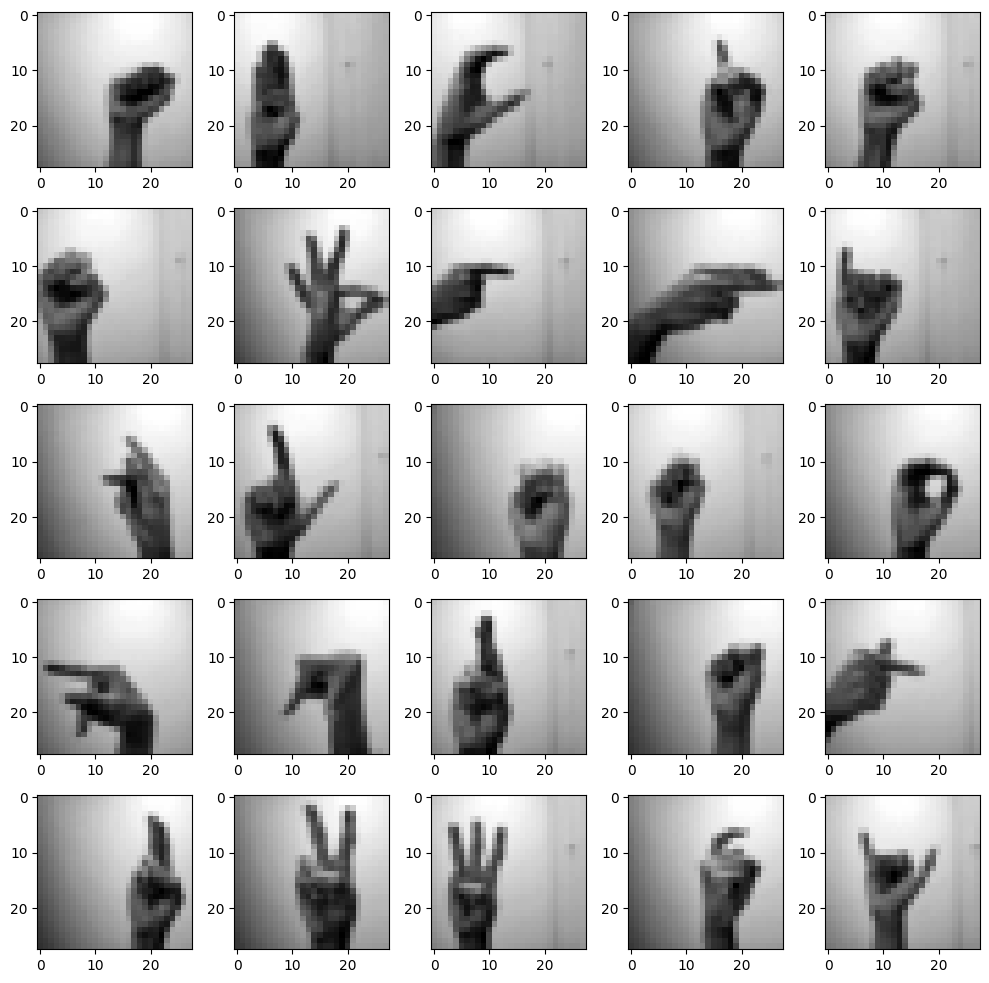

In [7]:
db_df = pd.read_csv("./db_new.csv")
del db_df['label']
db_df = db_df.values
db_df = db_df / 255
db_df = db_df.reshape(-1,28,28,1)

f, ax = plt.subplots(5,5)
f.set_size_inches(10, 10)
k = 0
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(db_df[k].reshape(28, 28), cmap='gray')
        k += 300
    plt.tight_layout()

### Import csv file

In [8]:
db_df = pd.read_csv("./db_new.csv")
db_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,125,128,131,134,138,141,144,147,151,...,71,122,125,124,122,122,121,120,119,118
1,0,125,127,131,134,137,141,144,147,151,...,73,123,125,124,122,121,120,120,120,118
2,0,125,127,130,134,138,141,144,147,151,...,73,123,124,124,123,121,121,120,119,118
3,0,125,128,131,134,137,141,144,147,151,...,73,123,125,124,123,121,120,120,119,118
4,0,125,128,131,134,138,141,144,147,151,...,72,123,125,124,123,121,120,120,119,118


### Split input dataset into training set and testing set with 'train_test_split()'
##### random seed: 1234

In [9]:
db_train, db_test = train_test_split(db_df, test_size=0.25, random_state=1234)
print(db_train.shape)
print(db_test.shape)

(5403, 785)
(1802, 785)


### Import kaggle dataset

In [179]:
train_df = pd.read_csv("./sign_mnist_train.csv")
test_df = pd.read_csv("./sign_mnist_test.csv")

In [180]:
train_df.shape

(27455, 785)

In [181]:
test_df.shape

(7172, 785)

In [182]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [183]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


### Example image from Kaggle dataset

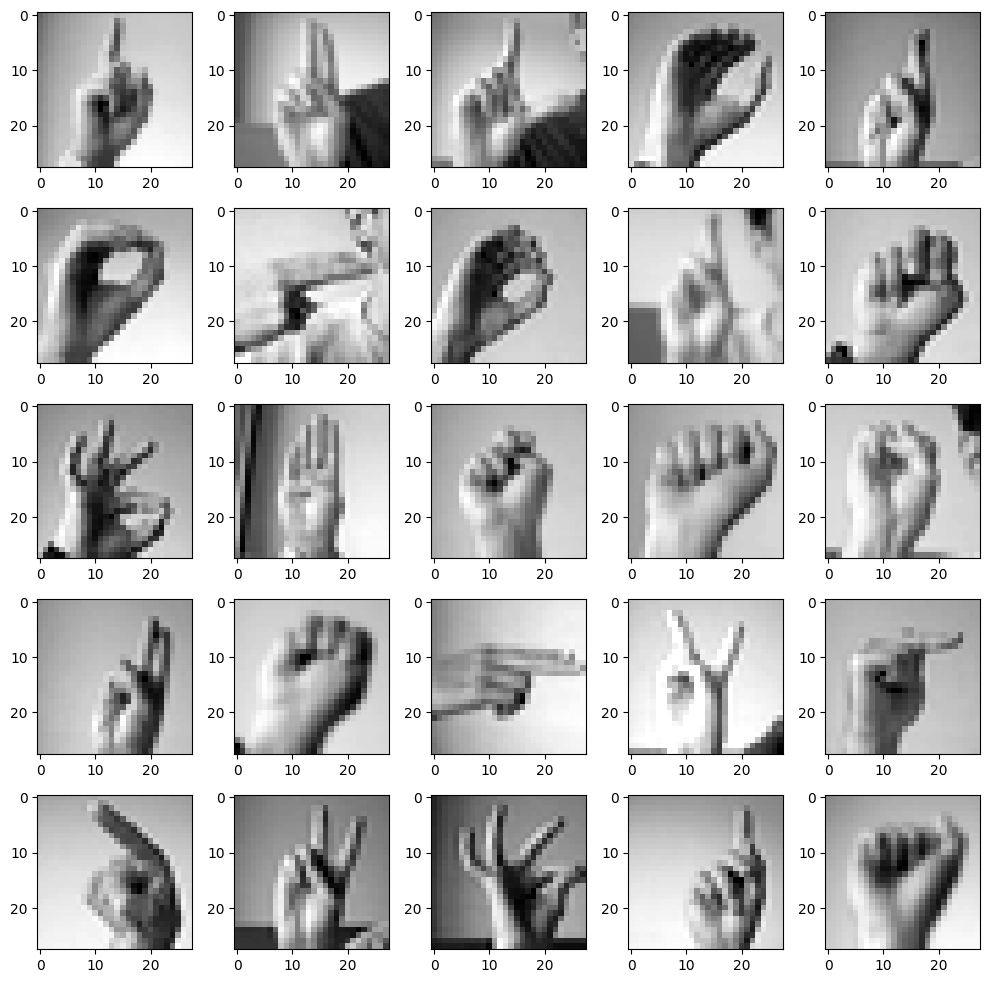

In [184]:
train_ex = pd.read_csv("./sign_mnist_train.csv")
del train_ex['label']
train_ex = train_ex.values
train_ex = train_ex / 255
train_ex = train_ex.reshape(-1,28,28,1)

f, ax = plt.subplots(5,5)
f.set_size_inches(10, 10)
k = 0
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(train_ex[k].reshape(28, 28), cmap='gray')
        k += 300
    plt.tight_layout()

### Concat kaggle dataset with input dataset

In [185]:
print('train before concat: {}'.format(train_df.shape))
print('test before concat: {}'.format(test_df.shape))

train_cdf = pd.concat([train_df, db_train[:]])
test_cdf = pd.concat([test_df, db_test[:]])
print('train after concat: {}'.format(train_cdf.shape))
print('test after concat: {}'.format(test_cdf.shape))


train_cdf = train_cdf.sample(frac=1, random_state=1234)
test_cdf = test_cdf.sample(frac=1, random_state=1234)

train before concat: (27455, 785)
test before concat: (7172, 785)
train after concat: (32858, 785)
test after concat: (8974, 785)


In [186]:
train_cdf.shape

(32858, 785)

In [187]:
train_vs = train_cdf
test_vs = test_cdf

### Split training set into training set and validation set with 'train_test_split()'
#### random seed: 1234

In [188]:
train_cdf, validation_cdf = train_test_split(train_cdf, test_size=0.2, random_state=1234)
print('training set: {}'.format(train_cdf.shape))
print('validation set: {}'.format(validation_cdf.shape))

training set: (26286, 785)
validation set: (6572, 785)


##

# Data Visualization

In [189]:
def compare_countplot(df1, df2, col, name1, name2):
    f, ax = plt.subplots(1,2) 
    f.set_size_inches(13, 5)
    sns.countplot(x=df1[col], ax=ax[0])
    sns.countplot(x=df2[col], ax=ax[1])
    ax[0].set_title(name1)
    ax[1].set_title(name2)

In [190]:
def countplot(df, col):
    f, ax = plt.subplots(1,1) 
    f.set_size_inches(10, 5)
    sns.countplot(x=df[col], ax=ax)

### Training set visualization

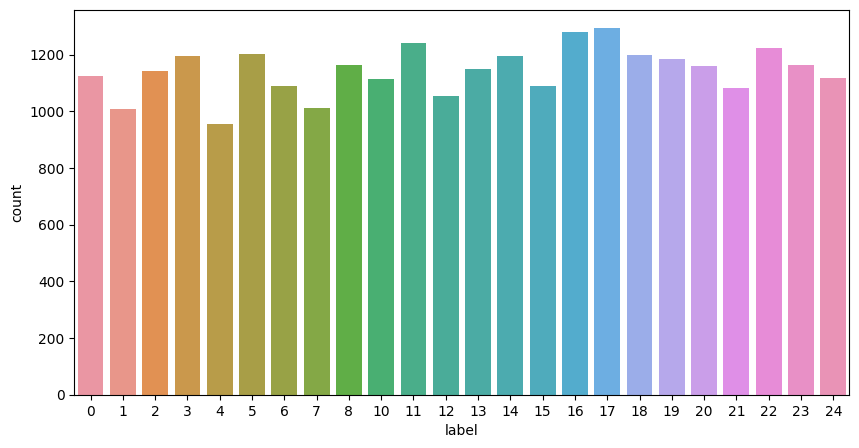

In [191]:
countplot(train_df, 'label')

### Testing set visualization

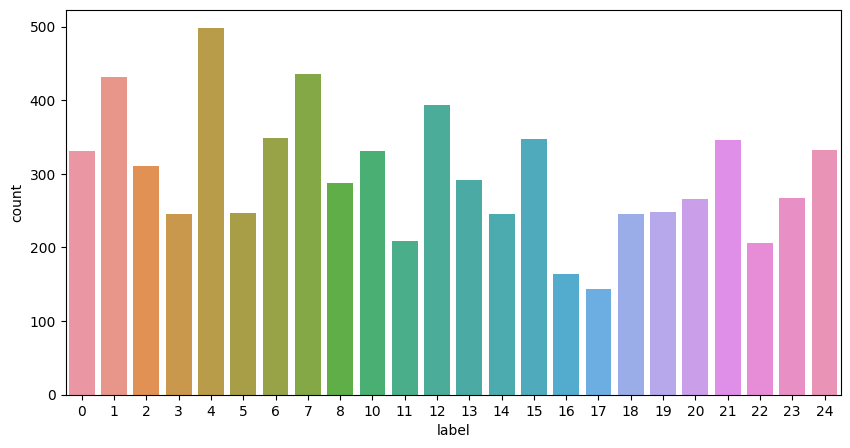

In [192]:
countplot(test_df, 'label')

### compare training set before concat and after concat

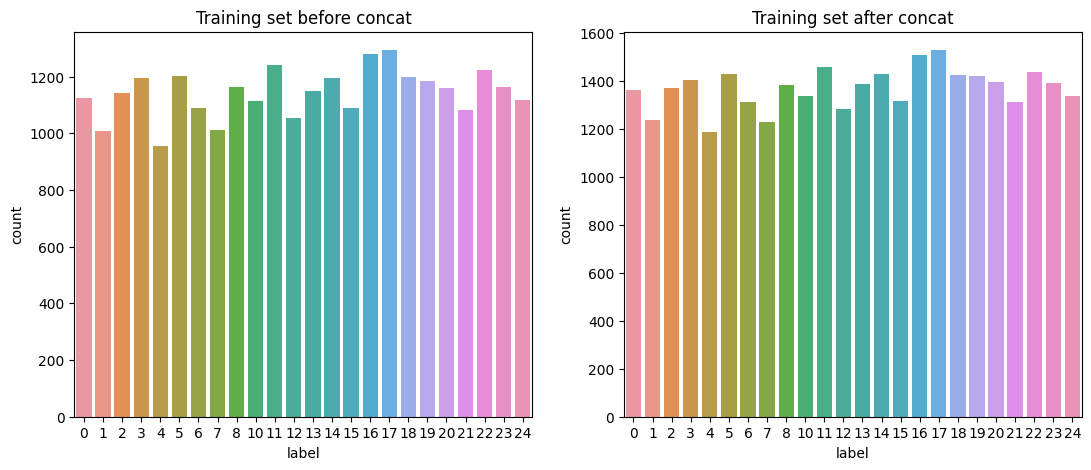

In [195]:
compare_countplot(train_df, train_vs, 'label', 'Training set before concat', 'Training set after concat')

### Show validation set

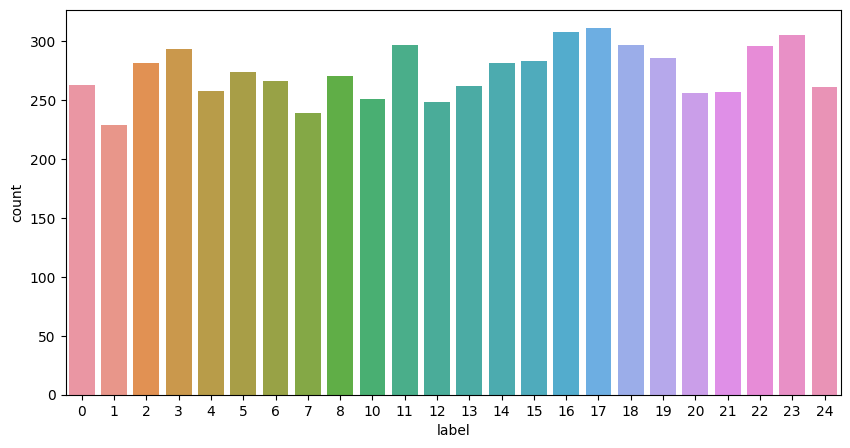

In [196]:
countplot(validation_cdf, 'label')

### compare testing set before concat and after concat

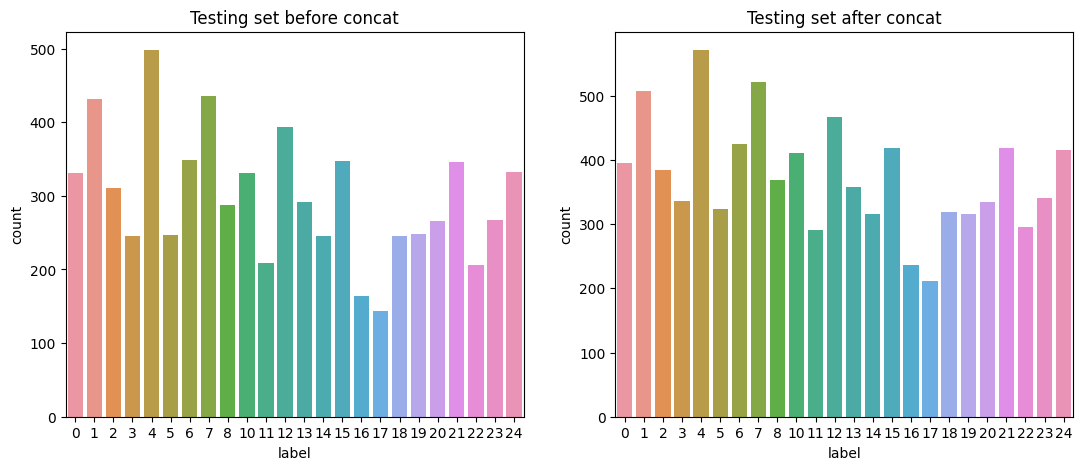

In [197]:
compare_countplot(test_df, test_vs, 'label', 'Testing set before concat', 'Testing set after concat')

In [31]:
train_cdf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10258,2,155,157,159,160,160,161,161,162,162,...,181,180,179,179,178,176,175,174,176,179
17930,23,146,152,157,159,163,168,173,175,179,...,134,134,135,133,131,131,133,127,156,223
15803,14,144,147,149,149,151,152,152,153,153,...,198,192,193,192,190,190,188,187,185,183
24300,3,125,131,136,139,142,145,147,150,152,...,195,195,195,194,194,194,194,193,191,190
3155,21,92,110,126,138,142,152,163,170,175,...,203,170,133,102,93,62,47,37,23,9


In [32]:
validation_cdf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
19921,10,25,102,49,0,34,36,38,42,47,...,184,146,91,61,56,71,72,72,70,65
15982,20,133,136,139,141,142,143,144,146,147,...,170,169,168,168,167,164,163,162,159,157
4355,15,126,127,130,134,137,141,144,147,152,...,63,59,71,124,126,124,123,122,122,120
629,8,202,203,203,203,203,203,202,203,203,...,221,224,222,222,220,218,216,215,214,212
2080,5,154,158,161,164,166,169,170,172,174,...,48,39,49,57,56,43,36,40,45,46


In [33]:
test_cdf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
5308,7,166,169,170,171,172,173,175,175,175,...,182,181,179,178,168,136,102,89,74,61
6579,3,191,194,199,201,202,204,204,206,208,...,47,71,101,73,69,84,107,121,91,60
2181,7,111,115,118,122,126,129,131,135,138,...,116,116,115,115,116,116,115,114,113,113
2815,7,172,172,173,173,173,173,173,173,172,...,199,199,198,196,195,193,178,95,76,124
7012,6,209,209,210,211,211,212,213,212,212,...,239,239,237,237,236,235,233,232,231,229


# Prepare Data

In [34]:
y_train = train_cdf['label']
y_val = validation_cdf['label']
y_test = test_cdf['label']
del train_cdf['label']
del validation_cdf['label']
del test_cdf['label']


In [35]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_val = label_binarizer.fit_transform(y_val)
y_test = label_binarizer.fit_transform(y_test)

X_train = train_cdf.values
X_val = validation_cdf.values
X_test = test_cdf.values

In [36]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [37]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

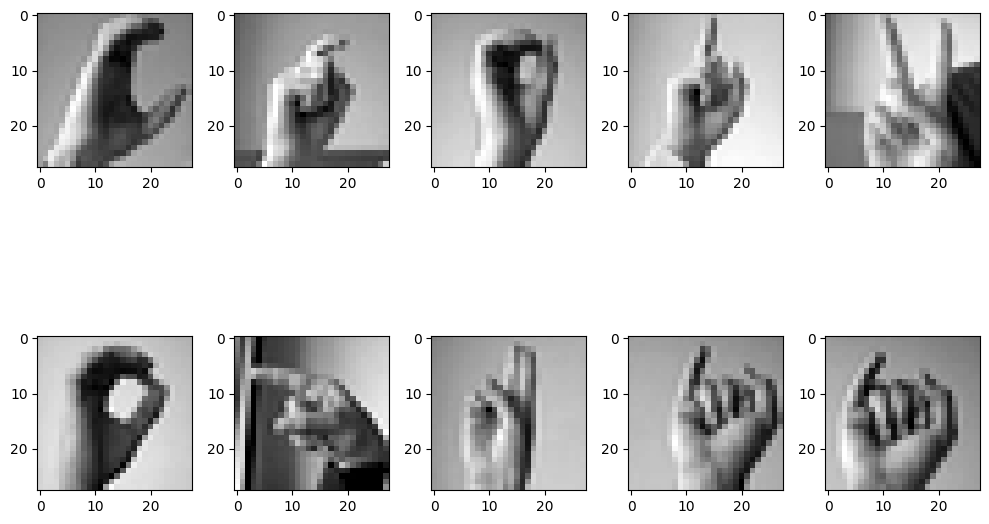

In [38]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28), cmap='gray')
        k += 1
    plt.tight_layout()

##

# Data Augmentation

### Data augmentation dataset with 'ImageDataGenerator()'

In [40]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)# randomly flip images

### Compare image before and after do data augmentation

In [41]:
datagen.fit(X_train)

In [42]:
datagenOrj = ImageDataGenerator()

In [43]:
datagenOrj.fit(X_train)

In [44]:
result_data     = datagen.flow(X_train, y_train, batch_size=2000, shuffle = False)
result_data_orj = datagenOrj.flow(X_train, y_train, batch_size=2000, shuffle = False)

In [45]:
batch_images, batch_labels = next(result_data)
batch_images_orj, batch_labels_orj = next(result_data_orj)

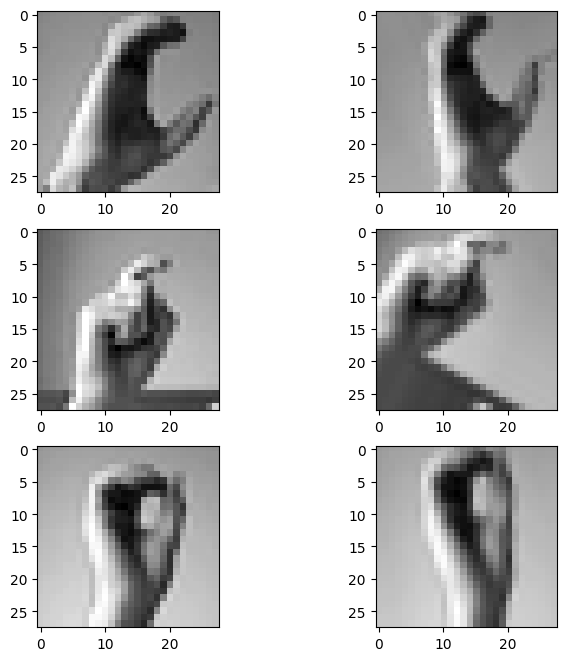

In [46]:
f, ax = plt.subplots(3,2) 
f.set_size_inches(8, 8)

for i in range(3):
    ax[i, 0].imshow(batch_images_orj[i].reshape(28, 28), cmap="gray")
    ax[i, 1].imshow(batch_images[i].reshape(28, 28), cmap="gray")
plt.show()

##

# Training The Model

In [47]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Conv2D(50 , (3,3) , strides = 1, activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Conv2D(25 , (3,3) , strides = 1, activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 25)          11275     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 25)          0

In [48]:
batch_size = 256
opt = optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [49]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
              epochs=120,
              validation_data=(X_val, y_val),
              shuffle=True)

Epoch 1/120
103/103 [==============================] - 15s 61ms/step - loss: 3.1479 - accuracy: 0.0663 - val_loss: 3.0311 - val_accuracy: 0.1500
Epoch 2/120
103/103 [==============================] - 6s 56ms/step - loss: 2.9730 - accuracy: 0.1165 - val_loss: 2.7524 - val_accuracy: 0.2864
Epoch 3/120
103/103 [==============================] - 6s 55ms/step - loss: 2.8061 - accuracy: 0.1589 - val_loss: 2.5194 - val_accuracy: 0.3322
Epoch 4/120
103/103 [==============================] - 6s 59ms/step - loss: 2.6570 - accuracy: 0.1974 - val_loss: 2.3394 - val_accuracy: 0.4341
Epoch 5/120
103/103 [==============================] - 6s 56ms/step - loss: 2.5345 - accuracy: 0.2259 - val_loss: 2.1680 - val_accuracy: 0.4915
Epoch 6/120
103/103 [==============================] - 6s 58ms/step - loss: 2.3860 - accuracy: 0.2619 - val_loss: 1.9929 - val_accuracy: 0.5018
Epoch 7/120
103/103 [==============================] - 6s 57ms/step - loss: 2.2594 - accuracy: 0.2920 - val_loss: 1.8084 - val_accuracy

### Save model

In [50]:
# serialize model to JSON
model_json = model.to_json()
with open("./model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")

##

# Analysis after Model Training

### Loss and accuracy

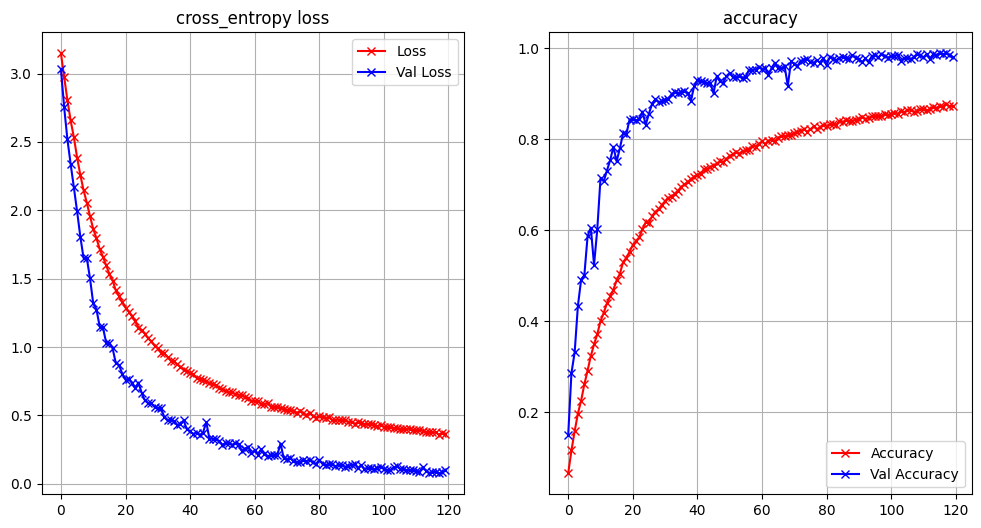

In [56]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Val Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Val Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

### Evaluate model

In [51]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.09609711915254593
Train accuracy: 0.980674147605896


In [54]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.09894131869077682
Validation accuracy: 0.9811320900917053


In [55]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13096700608730316
Test accuracy: 0.96712726354599


# Predict Sequence of images

### Predict X_test set

In [61]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
predictions_y_test = np.argmax(model.predict(X_test), axis=-1)

In [62]:
prediction_true = 0
picture = 0
for i in predictions_y_test:
    if np.where(y_test[picture])[0][0] == predictions_y_test[picture]:
        prediction_true += 1
    print('picture: {} solution: {} predict: {} isEqual: {}'.format(picture, labels[np.where(y_test[picture])[0][0]], 
                                                        labels[predictions_y_test[picture] - 1], labels[np.where(y_test[picture])[0][0]]==labels[predictions_y_test[picture]]))
    picture += 1

picture: 0 solution: H predict: G isEqual: True
picture: 1 solution: D predict: C isEqual: True
picture: 2 solution: H predict: G isEqual: True
picture: 3 solution: H predict: G isEqual: True
picture: 4 solution: G predict: F isEqual: True
picture: 5 solution: Y predict: X isEqual: True
picture: 6 solution: C predict: B isEqual: True
picture: 7 solution: T predict: S isEqual: True
picture: 8 solution: D predict: C isEqual: True
picture: 9 solution: Y predict: X isEqual: True
picture: 10 solution: F predict: E isEqual: True
picture: 11 solution: P predict: O isEqual: True
picture: 12 solution: S predict: R isEqual: True
picture: 13 solution: U predict: T isEqual: True
picture: 14 solution: Y predict: X isEqual: True
picture: 15 solution: W predict: V isEqual: True
picture: 16 solution: S predict: R isEqual: True
picture: 17 solution: S predict: L isEqual: False
picture: 18 solution: R predict: Q isEqual: True
picture: 19 solution: S predict: R isEqual: True
picture: 20 solution: M predi

In [63]:
print('predict True {} of {}'.format(prediction_true, len(predictions_y_test)))
print(prediction_true / len(predictions_y_test))

predict True 8679 of 8974
0.9671272565188321


### Show solution and result from predictions

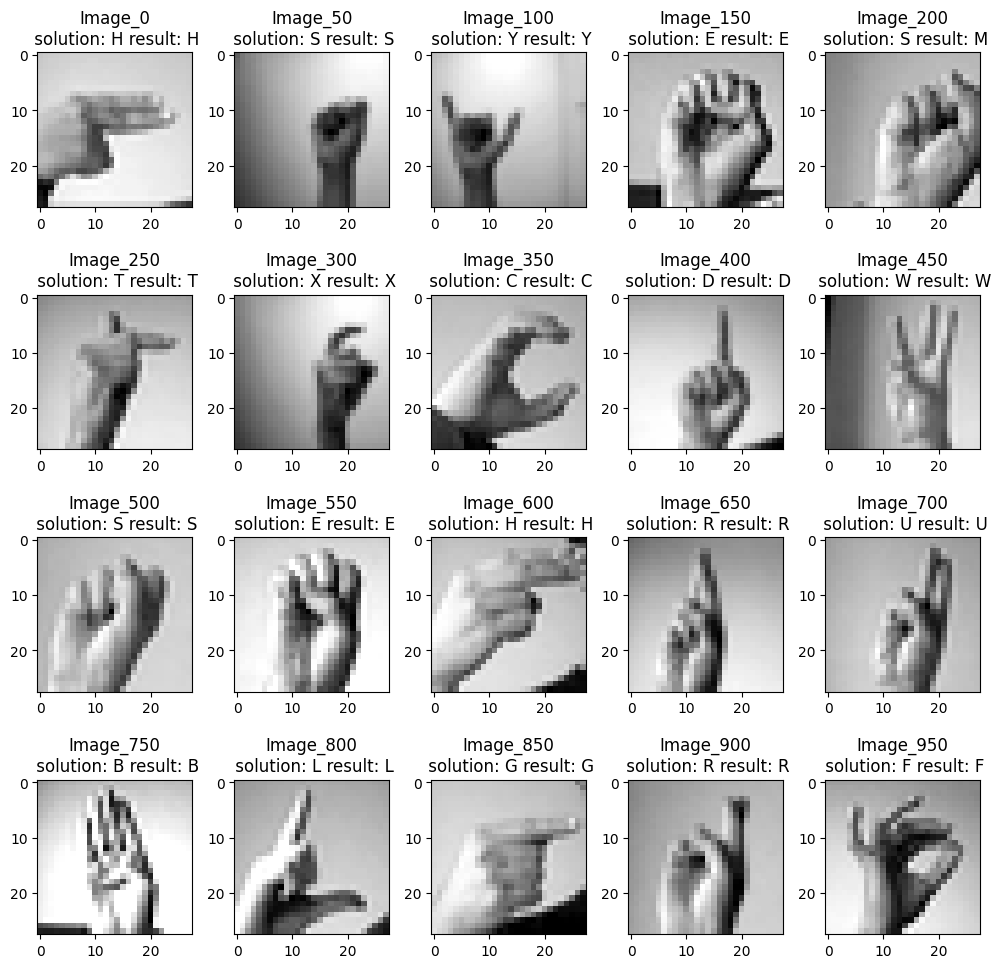

In [64]:
f, ax = plt.subplots(4,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(X_test[k].reshape(28, 28), cmap="gray")
        ax[i,j].set_title('Image_{}\n solution: {} result: {}'.format(k, labels[np.where(y_test[k])[0][0]], labels[predictions_y_test[k]]))
        k += 50
    plt.tight_layout()

##

# Analysis after Prediction

In [65]:
arg_y_test=np.argmax(y_test, axis=1)
arg_y_test

array([ 7,  3,  7, ..., 14,  8, 21], dtype=int64)

### Show classification report that contain precision, recall, f1-score and support value

In [67]:
# for i in range(len(predictions_y_test)):
#     if(predictions_y_test[i] >= 9):
#         predictions_y_test[i] += 1
        
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(arg_y_test, predictions_y_test, target_names = labels))

              precision    recall  f1-score   support

           A       0.98      0.86      0.91       395
           B       1.00      0.95      0.98       507
           C       1.00      0.95      0.97       384
           D       1.00      0.97      0.98       336
           E       0.97      0.94      0.96       571
           F       1.00      1.00      1.00       323
           G       0.96      1.00      0.98       425
           H       1.00      0.97      0.98       521
           I       1.00      1.00      1.00       368
           K       1.00      0.95      0.97       410
           L       1.00      1.00      1.00       291
           M       0.84      0.97      0.90       466
           N       0.78      0.99      0.87       357
           O       0.94      1.00      0.97       315
           P       1.00      1.00      1.00       419
           Q       1.00      1.00      1.00       237
           R       0.94      0.89      0.91       211
           S       0.91    

### Show confusion matrix

In [135]:
cm = confusion_matrix(arg_y_test, predictions_y_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [136]:
cmn = pd.DataFrame(cmn , index = labels , columns = labels)

Text(145.72222222222223, 0.5, 'Prediction')

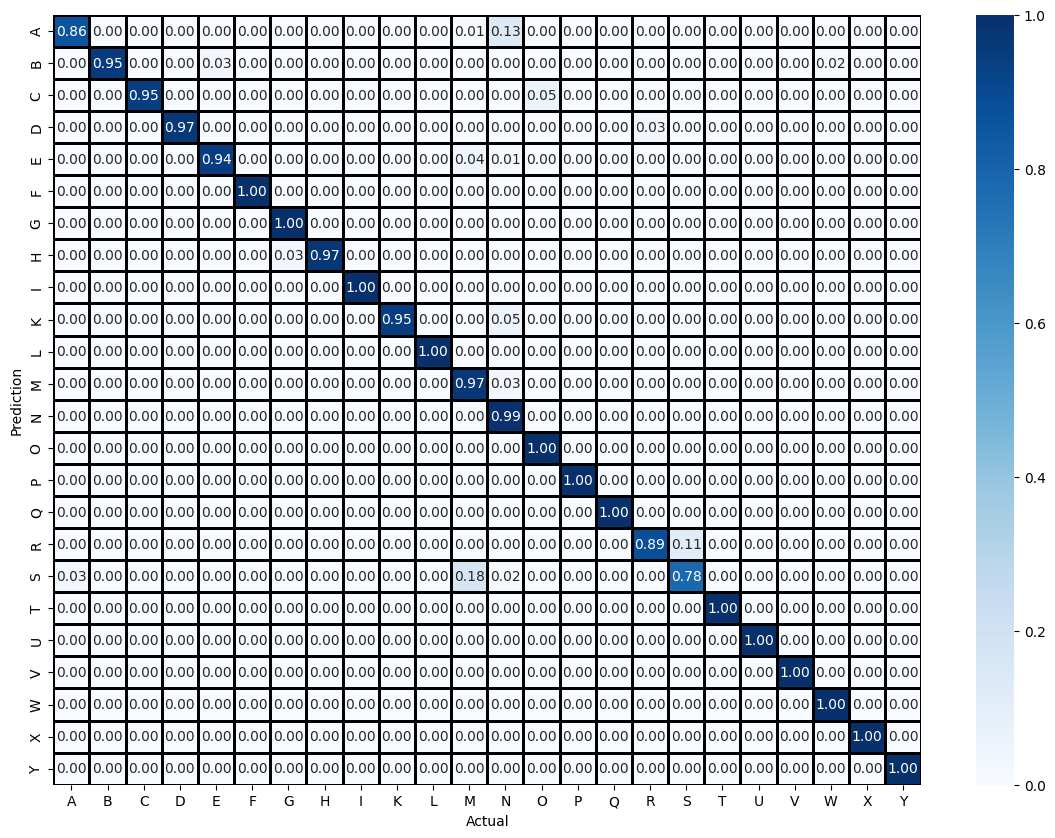

In [140]:
fig, ax = plt.subplots()
fig.set_figwidth(14)
fig.set_figheight(10)
sns.heatmap(cmn,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='.2f', ax=ax)

ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')


# Read new input data to predict

### Convert new input video and write to csv
โดย input video ประกอบด้วยภาษามือที่แสดงถึงตัวอักษร C A และ T ต่อเนื่องกัน 2 ครั้ง

In [ ]:
# import csv

# i = 0
# with open(f"{'CAT_image_db'}.csv", "a", newline="") as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow([f"pixel{i+1}" for i in range(28 * 28)])

#     #  convert video to image frame by frame
#     cap = cv2.VideoCapture('./image/{}.mp4'.format('CAT'))
#     interval = 100
#     cap.set(cv2.CAP_PROP_POS_MSEC, interval)
#     imgs = []
#     while(cap.isOpened()):
#         ret, frame = cap.read()
#         if ret == False:
#             break
#         cap.set(cv2.CAP_PROP_POS_MSEC, cap.get(cv2.CAP_PROP_POS_MSEC) + interval)
#         cropped_image = frame[:, 420:1500]
#         cv2.imwrite('./CAT_image/CAT_image_{}.jpg'.format(i), cropped_image)
#         #  append frame type Image to array 'imgs'
#         imgs.append(cropped_image)
#         i += 1
#     cap.release()
#     cv2.destroyAllWindows()
#     #  convert array to np.array
#     imgs = np.array(imgs)

#     #  write Image type to csv file
#     for img in imgs:
#         img = Image.fromarray(img)
#         img = img.convert("L")
#         print(img)
#         img = img.resize((28, 28), resample=Image.BILINEAR)
#         width, height = img.size
#         #  getdata() : get pixel data from image
#         pixels = list(img.getdata())
#         row = pixels
#         writer.writerow(row)
#         print(img)
    
# print('number of image is ' + str(i))

### Read csv

In [118]:
CAT_db = pd.read_csv("./CAT_image_db.csv")

CAT_x = CAT_db.values
CAT_x = CAT_x / 255
CAT_x = CAT_x.reshape(-1,28,28,1)

In [129]:
CAT_x.shape

(161, 28, 28, 1)

### Preview input image

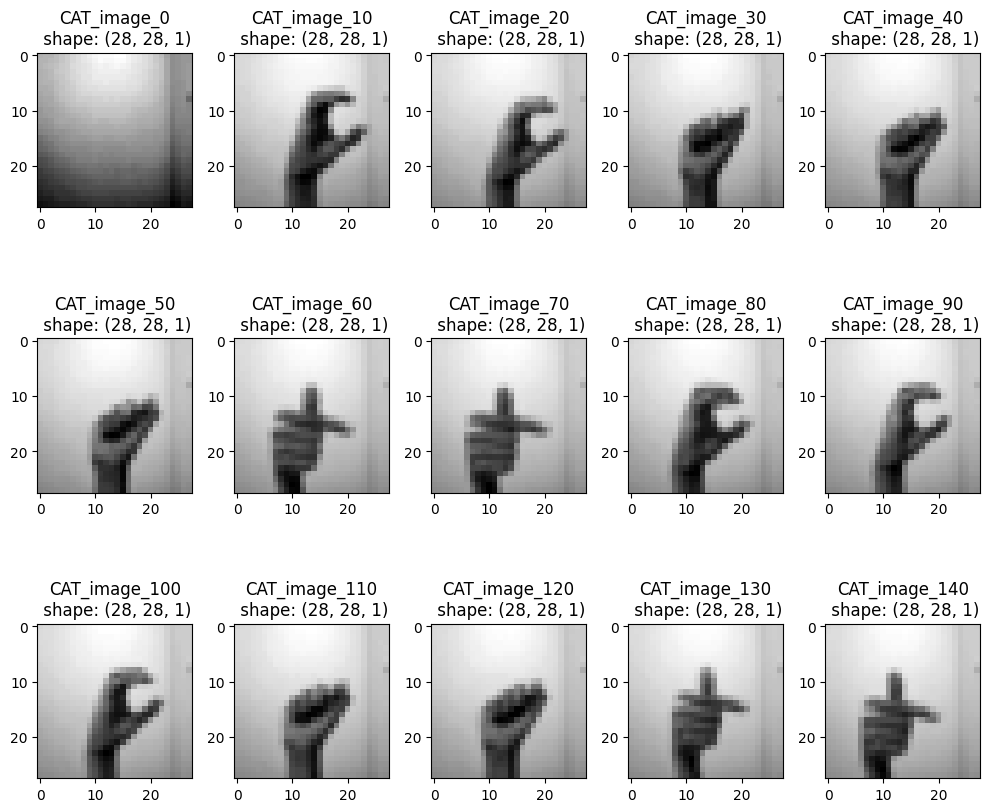

In [119]:
# plt.imshow(input_x[0].reshape(28, 28), cmap='gray')

f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(CAT_x[k].reshape(28, 28), cmap="gray")
        ax[i,j].set_title('CAT_image_{}\n shape: {}'.format(k, CAT_x[k].shape))
        k += 10
    plt.tight_layout()

### Predict new input data

In [120]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
y_CAT_predictions = np.argmax(model.predict(CAT_x), axis=-1)

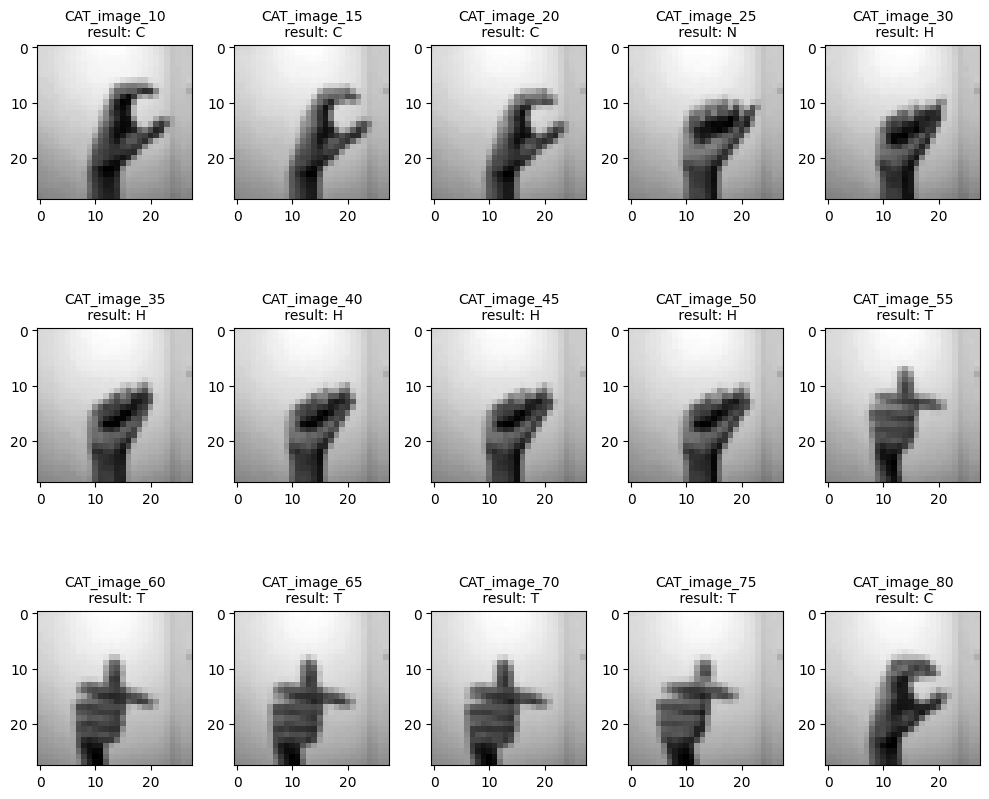

In [121]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 10
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(CAT_x[k].reshape(28, 28), cmap="gray")
        ax[i,j].set_title('CAT_image_{}\n result: {}'.format(k, labels[y_CAT_predictions[k]]), fontdict={'fontsize': 10})
        k += 5
    plt.tight_layout()

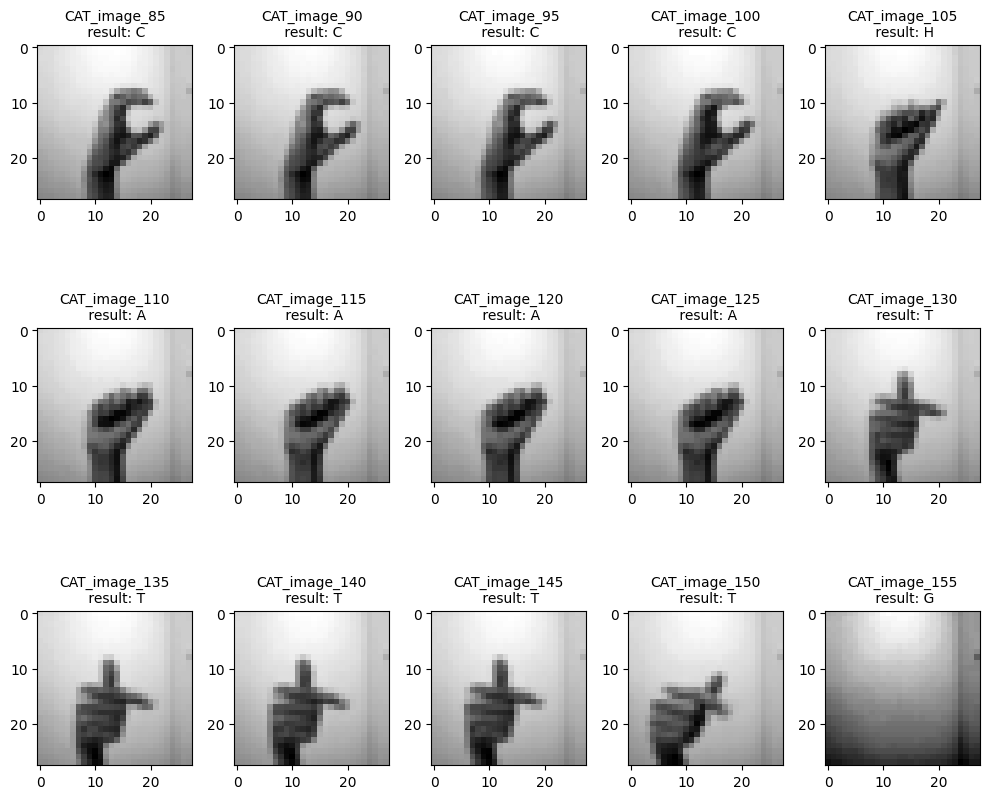

In [122]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 85
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(CAT_x[k].reshape(28, 28), cmap="gray")
        ax[i,j].set_title('CAT_image_{}\n result: {}'.format(k, labels[y_CAT_predictions[k]]), fontdict={'fontsize': 10})
        k += 5
    plt.tight_layout()

#### แสดงการตีความตัวอักษรจากภาพตามลำดับ

In [127]:
picture_number = 0
for i in y_CAT_predictions:
    print('Picture number: {} Prediction: {}'.format(picture_number, labels[i]))
    picture_number += 1

Picture number: 0 Prediction: G
Picture number: 1 Prediction: G
Picture number: 2 Prediction: G
Picture number: 3 Prediction: G
Picture number: 4 Prediction: G
Picture number: 5 Prediction: G
Picture number: 6 Prediction: B
Picture number: 7 Prediction: E
Picture number: 8 Prediction: C
Picture number: 9 Prediction: C
Picture number: 10 Prediction: C
Picture number: 11 Prediction: C
Picture number: 12 Prediction: C
Picture number: 13 Prediction: C
Picture number: 14 Prediction: C
Picture number: 15 Prediction: C
Picture number: 16 Prediction: C
Picture number: 17 Prediction: C
Picture number: 18 Prediction: C
Picture number: 19 Prediction: C
Picture number: 20 Prediction: C
Picture number: 21 Prediction: C
Picture number: 22 Prediction: C
Picture number: 23 Prediction: C
Picture number: 24 Prediction: N
Picture number: 25 Prediction: N
Picture number: 26 Prediction: H
Picture number: 27 Prediction: H
Picture number: 28 Prediction: H
Picture number: 29 Prediction: H
Picture number: 30 P

#### แสดงการตีความตัวอักษรจากภาพตามลำดับ โดยยุบรวมส่วนที่ตีความเป็นตัวอักษรเดียวกันต่อเนื่องกันเป็นตัวอักษรเดียว

In [123]:
arr = []
for i in range(len(y_CAT_predictions)):
    if i == len(y_CAT_predictions) - 1:
        break
    if y_CAT_predictions[i+1] == y_CAT_predictions[i]:
        continue
    else:
        arr.append(y_CAT_predictions[i])
for i in arr:
    print(labels[i])

G
B
E
C
N
H
A
H
N
G
T
Y
C
H
N
A
N
T
I
